In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
history = pd.read_csv("history.csv")

In [4]:
history.head()

,Date,Hour,Temperature,Load
0,01-Jan-02,1,54.86,1031754.25
1,01-Jan-02,2,54.23,996580.00
2,01-Jan-02,3,53.72,968291.00
3,01-Jan-02,4,53.38,963509.75
4,01-Jan-02,5,52.91,983291.25


In [5]:
X=history.drop("Load",axis=1)  # feature columns
X=X.drop("Date",axis=1)
y=history["Load"]   #label column

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
X_train.head()

,Hour,Temperature
4432,17,83.96
5632,17,85.56
1966,23,60.23
7643,12,74.68
4737,10,83.19


In [9]:
y_train.head()

4432    2000811.25
5632    2126601.25
1966    1015944.50
7643    1136355.25
4737    1516157.25
Name: Load, dtype: float64

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train,y_train)

LinearRegression()

In [13]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)
history["Load"].min()

668059.5

Text(37.597222222222214, 0.5, 'Predicted Load')

<Figure size 2400x400 with 0 Axes>

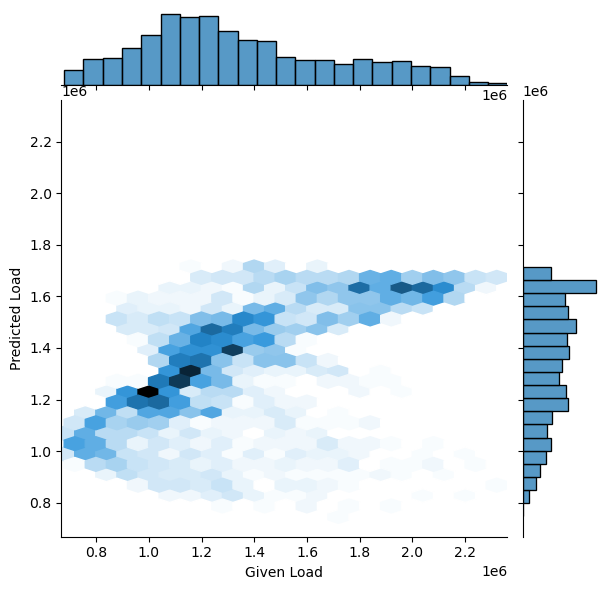

In [14]:
plt.figure(figsize=(12,2),dpi=200)
sns.jointplot(x=y_test,y=test_predictions,kind="hex",xlim=[668059.5,2359872.25],ylim=[668059.5,2359872.25],);

plt.xlabel("Given Load")
plt.ylabel("Predicted Load")

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [17]:
MAE

235684.1858826467

In [18]:
RMSE

292636.5608181012

In [19]:
total_mean = history["Load"].mean()

In [45]:
percentage_error = (RMSE/total_mean)*100
percentage_error

21.765610953234123

In [21]:
# If our model was perfect, these errors would all be zeros
test_res = y_test - test_predictions

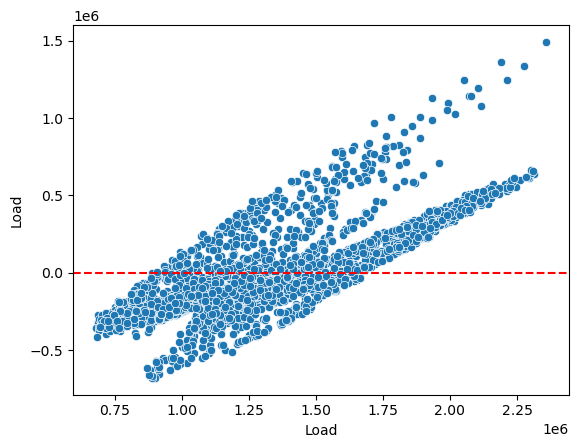

In [22]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

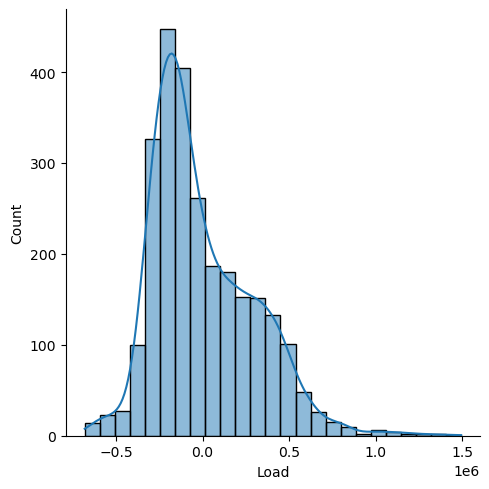

In [23]:
sns.displot(test_res,bins=25,kde=True)

In [24]:
import scipy as sp

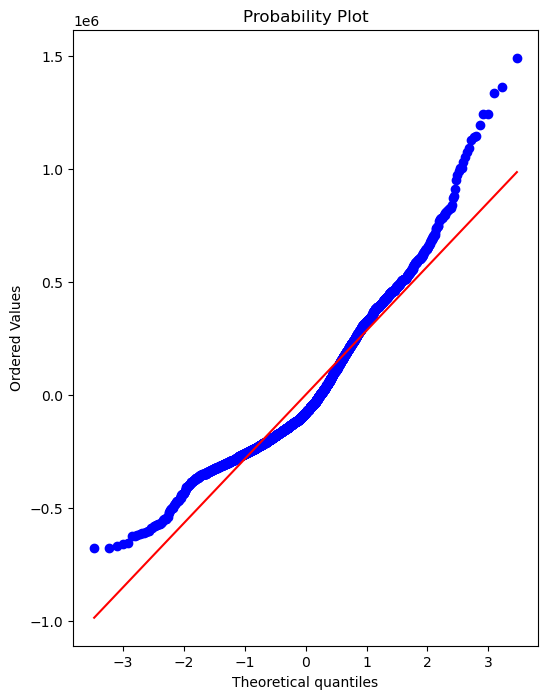

In [25]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

In [26]:
final_model = LinearRegression()

In [27]:
final_model.fit(X,y)

LinearRegression()

In [28]:
y_hat = final_model.predict(X)

Text(0.5, 1.0, 'Temperature')

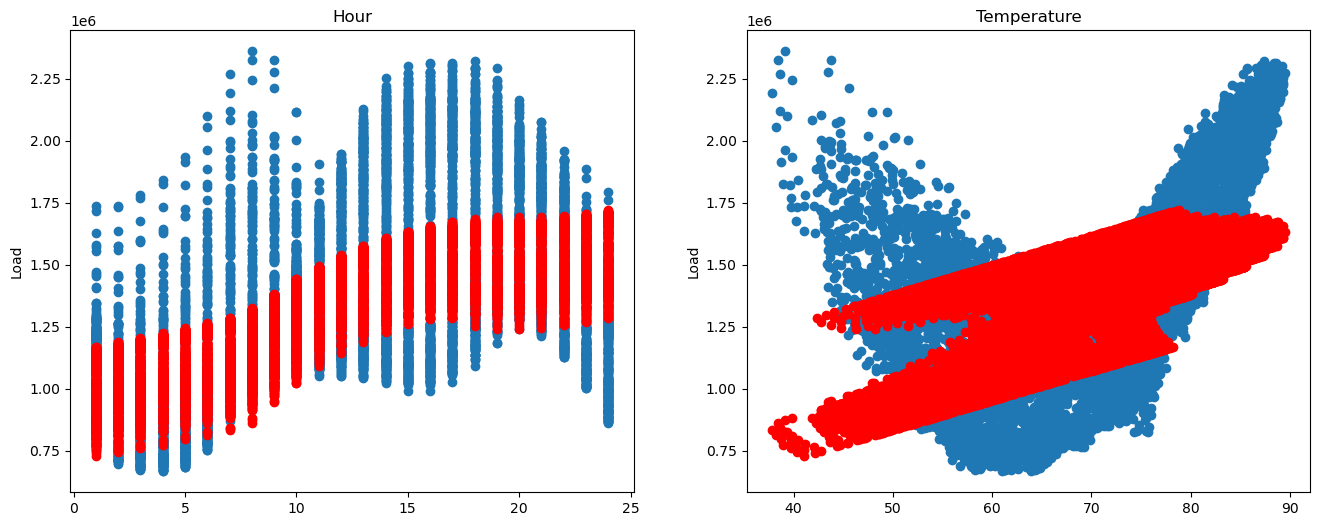

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))

axes[0].plot(history['Hour'],history['Load'],'o')
axes[0].plot(history['Hour'],y_hat,'o',color='red')
axes[0].set_ylabel("Load")
axes[0].set_title("Hour")

axes[1].plot(history['Temperature'],history['Load'],'o')
axes[1].plot(history['Temperature'],y_hat,'o',color='red')
axes[1].set_ylabel("Load")
axes[1].set_title("Temperature")


In [30]:
residuals = y_hat - y

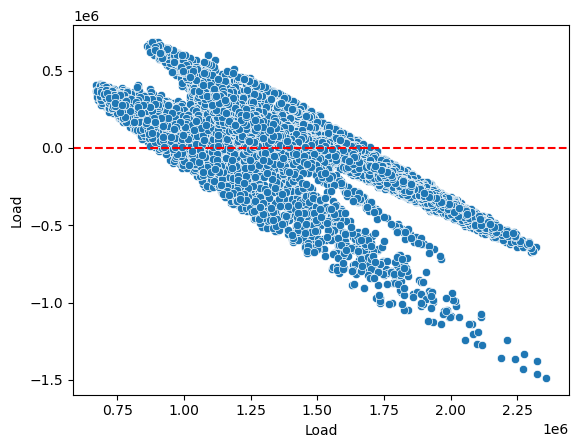

In [31]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [32]:
final_model.coef_

array([23565.30008189, 11849.65352259])

In [33]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Hour,23565.300082
Temperature,11849.653523


In [34]:
from joblib import dump, load

In [35]:
dump(final_model, 'Linear-reg-model.joblib') 

['Linear-reg-model.joblib']

In [36]:
loaded_model = load('Linear-reg-model.joblib')

In [37]:
data_to_be_predicted = pd.read_csv("data-to-be-forecast.csv")

In [38]:
data_to_be_predicted.head()

,Date,Hour,Temperature,Load
0,01-Jan-06,1,60.52,NaN
1,01-Jan-06,2,60.32,NaN
2,01-Jan-06,3,60.16,NaN
3,01-Jan-06,4,59.84,NaN
4,01-Jan-06,5,59.88,NaN


In [39]:
feature_data = data_to_be_predicted[["Hour","Temperature"]]

In [40]:
feature_data

,Hour,Temperature
0,1,60.52
1,2,60.32
2,3,60.16
3,4,59.84
4,5,59.88
...,...,...
8755,20,71.48
8756,21,70.88
8757,22,70.32
8758,23,69.84


In [41]:
data_to_be_predicted["Load"]=loaded_model.predict(feature_data)

In [42]:
data_to_be_predicted

,Date,Hour,Temperature,Load
0,01-Jan-06,1,60.52,9.609005e+05
1,01-Jan-06,2,60.32,9.820959e+05
2,01-Jan-06,3,60.16,1.003765e+06
3,01-Jan-06,4,59.84,1.023539e+06
4,01-Jan-06,5,59.88,1.047578e+06
...,...,...,...,...
8755,31-Dec-06,20,71.48,1.538513e+06
8756,31-Dec-06,21,70.88,1.554969e+06
8757,31-Dec-06,22,70.32,1.571898e+06
8758,31-Dec-06,23,69.84,1.589776e+06


In [43]:
predicted_data_by_linearRegression = data_to_be_predicted

In [44]:
predicted_data_by_linearRegression.to_csv("predicted_data_by_linearRegression.csv",index=False)